In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [3]:
folders = glob('Datasets/Train/*')
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [4]:
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [6]:
r=model.fit_generator(training_set,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 25)


C:\Myfiles\Apps\envs\tensor\lib\site-packages\ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
61/61 [==============================] - 33s 449ms/step - loss: 0.5979 - accuracy: 0.7719 - val_loss: 0.2405 - val_accuracy: 0.9245
Epoch 2/10
61/61 [==============================] - 19s 305ms/step - loss: 0.2550 - accuracy: 0.9031
Epoch 3/10
61/61 [==============================] - 19s 312ms/step - loss: 0.1760 - accuracy: 0.9354
Epoch 4/10
61/61 [==============================] - 19s 311ms/step - loss: 0.1268 - accuracy: 0.9605
Epoch 5/10
61/61 [==============================] - 19s 313ms/step - loss: 0.1089 - accuracy: 0.9616
Epoch 6/10
61/61 [==============================] - 19s 315ms/step - loss: 0.0898 - accuracy: 0.9698
Epoch 7/10
61/61 [==============================] - 19s 316ms/step - loss: 0.0731 - accuracy: 0.9826
Epoch 8/10
61/61 [==============================] - 19s 313ms/step - loss: 0.0766 - accuracy: 0.9728
Epoch 9/10
61/61 [==============================] - 19s 309ms/step - loss: 0.0696 - accuracy: 0.9754
Epoch 10/10
61/61 [==============================

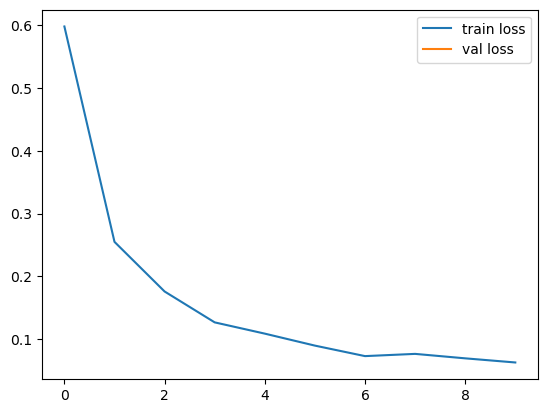

<Figure size 640x480 with 0 Axes>

In [7]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

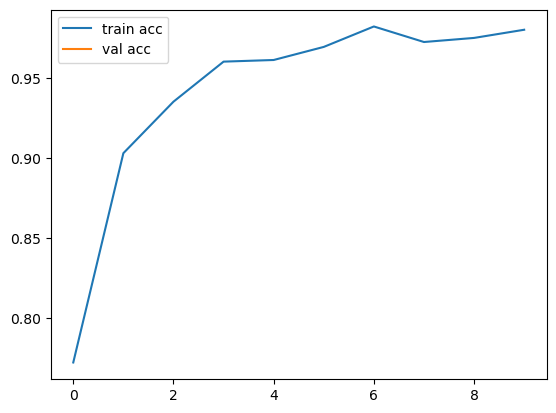

<Figure size 640x480 with 0 Axes>

In [8]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [9]:
import tensorflow as tf
from keras.models import load_model
model.save('plant disease_model.h5')